In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import sys
import string

import statsmodels.api as sm
import statsmodels.formula.api as sms

# sys.path.append('../../CoefPlot')

# import plots.CoefPlot 
import matplotlib as mpl
%matplotlib inline

# %load_ext autoreload

# %autoreload 2

In [2]:
import CoefPlots as cpl

The aim is to create coefficient plots like this, in order to present regression results alongwith additional details. 
<div align="center"> <img src="./docs/test.png" height="300"> </div> 

Here is another example, used in a current working paper. 
<div align="center"> <img src="./docs/Nigeria_h6.png" height="300"> </div> 

##### Coefficient Plots

1. First, create some dummy regression results for the example. 

In [3]:
from sklearn import datasets

def get_reg_data(result_obj, rounding=3):
    """
    Helper function to get regression results into a dataframe
    """
    reg_result=pd.concat([result_obj.params, 
                      result_obj.pvalues, 
                      result_obj.conf_int()], axis=1)
    
    reg_result.columns=['coef', 'pvalue', 'ci_left', 'ci_right']
    reg_result['ci_length']=reg_result['coef']-reg_result['ci_left']
    reg_result=reg_result.round(rounding)
    return reg_result

#load the Iris Dataset
iris=datasets.load_iris()

iris=pd.DataFrame(np.concatenate([iris.data, 
                             iris.target.reshape([-1, 1])], axis=1))

iris.columns=['sepal_length', 
              'sepal_width', 
              'petal_length', 
              'petal_width', 
              'iris_type']

iris=pd.concat([iris, pd.get_dummies(iris['iris_type'].astype(int), 
                                     prefix='type')], axis=1)


#Run a simple OLS Regression. The coefficients are meaningless, just for the sake of getting some data. 
reg=sms.ols('sepal_length~sepal_width+petal_length+petal_width+type_1+type_2', 
                   data=iris).fit(cov_type='HC1')


#get regression results in a pandas dataframe
reg_result=get_reg_data(reg)

#add in some additional columns with random data, to add additional columns to the table 
for i in range(4):
    reg_result[f'randcol{i}']=np.random.random(len(reg_result)).round(3)

reg_result





,coef,pvalue,ci_left,ci_right,ci_length,randcol0,randcol1,randcol2,randcol3
Intercept,2.171,0.000,1.687,2.655,0.484,0.122,0.102,0.853,0.698
sepal_width,0.496,0.000,0.339,0.653,0.157,0.098,0.180,0.697,0.233
petal_length,0.829,0.000,0.688,0.970,0.141,0.463,0.992,0.376,0.413
petal_width,-0.315,0.055,-0.637,0.007,0.322,0.837,0.729,0.995,0.914
type_1,-0.724,0.002,-1.189,-0.258,0.465,0.697,0.543,0.950,0.062
type_2,-1.023,0.003,-1.705,-0.342,0.681,0.783,0.361,0.529,0.628


##### 

2. Define all parameters for the plot. There are 5 required parameters

    - Coefficient values (x)
    - Confidence interval lengths (xerror): that is, $1.96*\mbox{std. error}$. The get_reg_data function written above extracts this        from the regression results. 
    - Coefficient Labels (ylabels)
    - Data for the table (tabledata): Matplotlib requires the data to be an ndarray, so I get these from the *reg_result*              dataframe (Created above)
    - Column Names for the table (col_dict) - a dictionary of the variable names from *reg_result*, and the desired column            names.
    

In [4]:

#sorting the order so that the Intercept is at the bottom
x=reg_result['coef'].values[::-1]

xerror=reg_result['ci_length'].values[::-1]

ylabels=['Intercept', 
         'Sepal Width', 
         'Petal Length', 
         'Petal Width', 
         'Iris Type 1 Random Long String',
         'Iris Type 2'][::-1]

#Pick 4 columns to visualize
col_dict={
    'coef': "Coef.",
 'pvalue': "p-val",
 'ci_left': "ci:left",
 'ci_right': "ci:right"}


tabledata=reg_result[col_dict.keys()].values

#display
tabledata

array([[ 2.171e+00,  0.000e+00,  1.687e+00,  2.655e+00],
       [ 4.960e-01,  0.000e+00,  3.390e-01,  6.530e-01],
       [ 8.290e-01,  0.000e+00,  6.880e-01,  9.700e-01],
       [-3.150e-01,  5.500e-02, -6.370e-01,  7.000e-03],
       [-7.240e-01,  2.000e-03, -1.189e+00, -2.580e-01],
       [-1.023e+00,  3.000e-03, -1.705e+00, -3.420e-01]])

**Plot 1**
- Generate Coefficient Plot with Default Formatting
- Add Table (on the right of the plot) with 4 columns

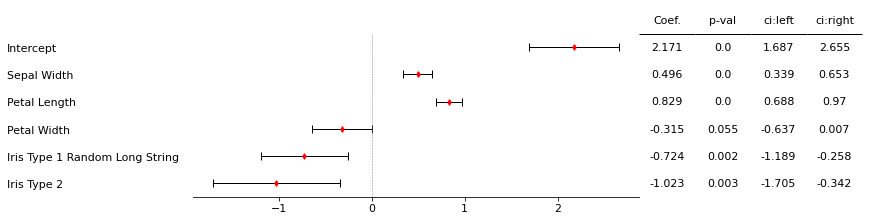

In [8]:

fig=cpl.make_coef_plot(x, 
                   xerror, 
                   ylabels, 
                   tabledata, 
                   col_dict)


fig.savefig("test.png", bbox_inches = "tight")

**Plot 2**
- Generate Coefficient Plot with Default Formatting
- Add Table (on the left of the plot) with 4 columns

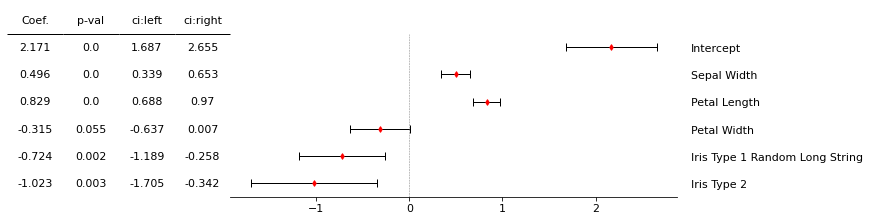

In [10]:
fig=cpl.make_coef_plot(x, 
                   xerror, 
                   ylabels, 
                   tabledata, 
                   col_dict, 
                   table_position="left")


fig.savefig("test.png", bbox_inches = "tight")

**Plot 3**
- Generate Coefficient Plot with Default Formatting
- Add Table (on the right of the plot), increase number of columns to 8

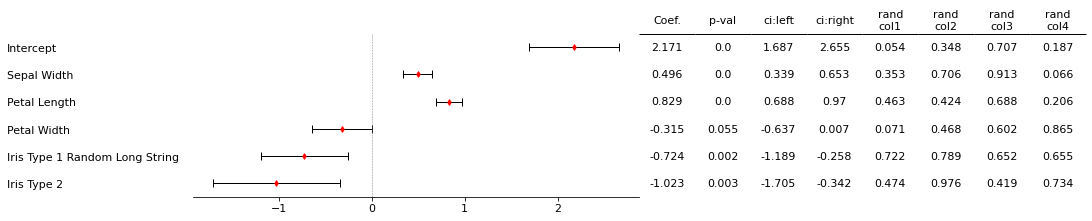

In [11]:
#Plot 1, more columns

col_dict={
    'coef': "Coef.",
 'pvalue': "p-val",
 'ci_left': "ci:left",
 'ci_right': "ci:right",
 'randcol0': "rand\ncol1",
 'randcol1': "rand\ncol2",
 'randcol2': "rand\ncol3",
 'randcol3': "rand\ncol4"
}
tabledata=reg_result[col_dict.keys()].values

fig=cpl.make_coef_plot(x, 
               xerror, 
               ylabels, 
               tabledata, 
               col_dict)


fig.savefig("test.png", bbox_inches = "tight")

**Plot 4**
- Same plot as above, but with custom formatting
- Any matplotlib formatting options can be passed through "kwarg_dict", for the respective parts of the plot

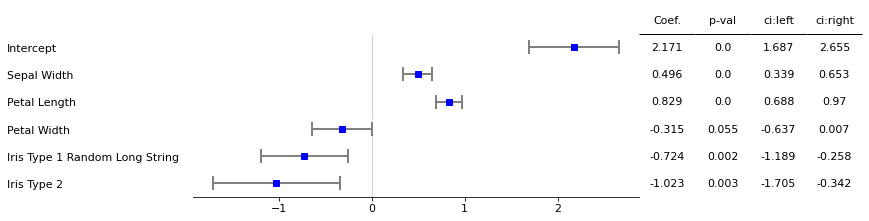

In [6]:
#change the color and size of the markers, and color + linestyle of the errorbars.

fig=cpl.make_coef_plot(x, 
               xerror, 
               ylabels, 
               tabledata, 
               col_dict,  
              kwarg_dict={"marker_kwargs":{"fmt":"bs", "markersize":6}, 
                          "errorbar_kwargs":{"ecolor":"grey", "elinewidth":2, "capsize":7,  "capthick":2}})


fig.savefig("test.png", bbox_inches = "tight")

**Plot 5**

- use Latex formatting in the y labels
- Note that this slows down the whole thing. 

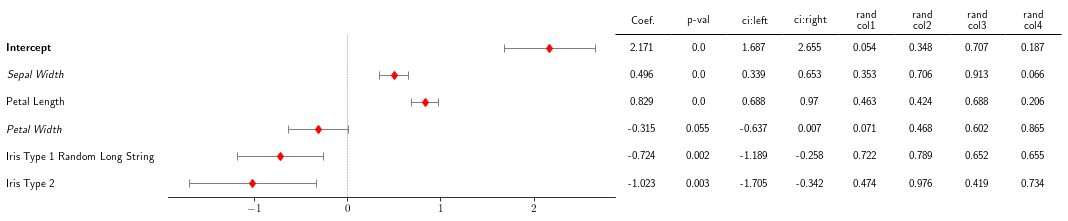

In [13]:
mpl.rc('text', usetex=True)

ylabels=['\\textbf{Intercept}', 
         '\\textit{Sepal Width}', 
         'Petal Length', 
         '\\emph{Petal Width}', 
         'Iris Type 1 Random Long String',
         'Iris Type 2'][::-1]

fig=cpl.make_coef_plot(x,  
               xerror, 
               ylabels, 
               tabledata, 
               col_dict, 
              table_position="right", 
              kwarg_dict={"marker_kwargs":{"fmt":"bs", "markersize":6}, 
                          "errorbar_kwargs":{"color":"gray"}})


fig.savefig("test.png", bbox_inches = "tight")

**Plot 6**

- Another example with Latex labels/ different formatting. 

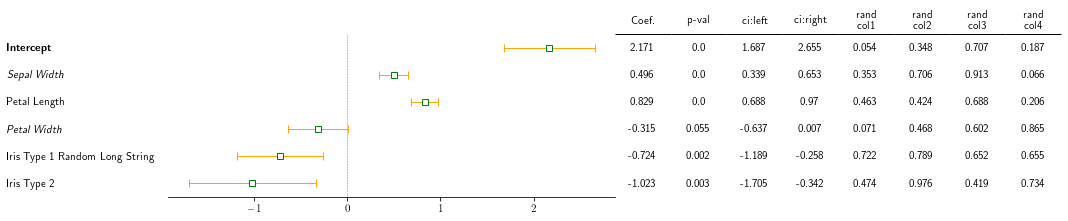

In [19]:
### Example using Latex text labels

ylabels=['\\textbf{Intercept}', 
         '\\textit{Sepal Width}', 
         'Petal Length', 
         '\\emph{Petal Width}', 
         'Iris Type 1 Random Long String',
         'Iris Type 2'][::-1]



#Generate Coefficient Plot
fig=cpl.make_coef_plot(x, 
                   xerror, 
                   ylabels, 
                   tabledata, 
                   col_dict, 
              kwarg_dict={"marker_kwargs":{"color":"w", "marker":"s", "markersize":6, "markeredgecolor":"green"}, 
                          "errorbar_kwargs":{"color":"orange"}})


fig.savefig("test.png", bbox_inches = "tight")